In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.drop(['id','date',],inplace=True ,axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

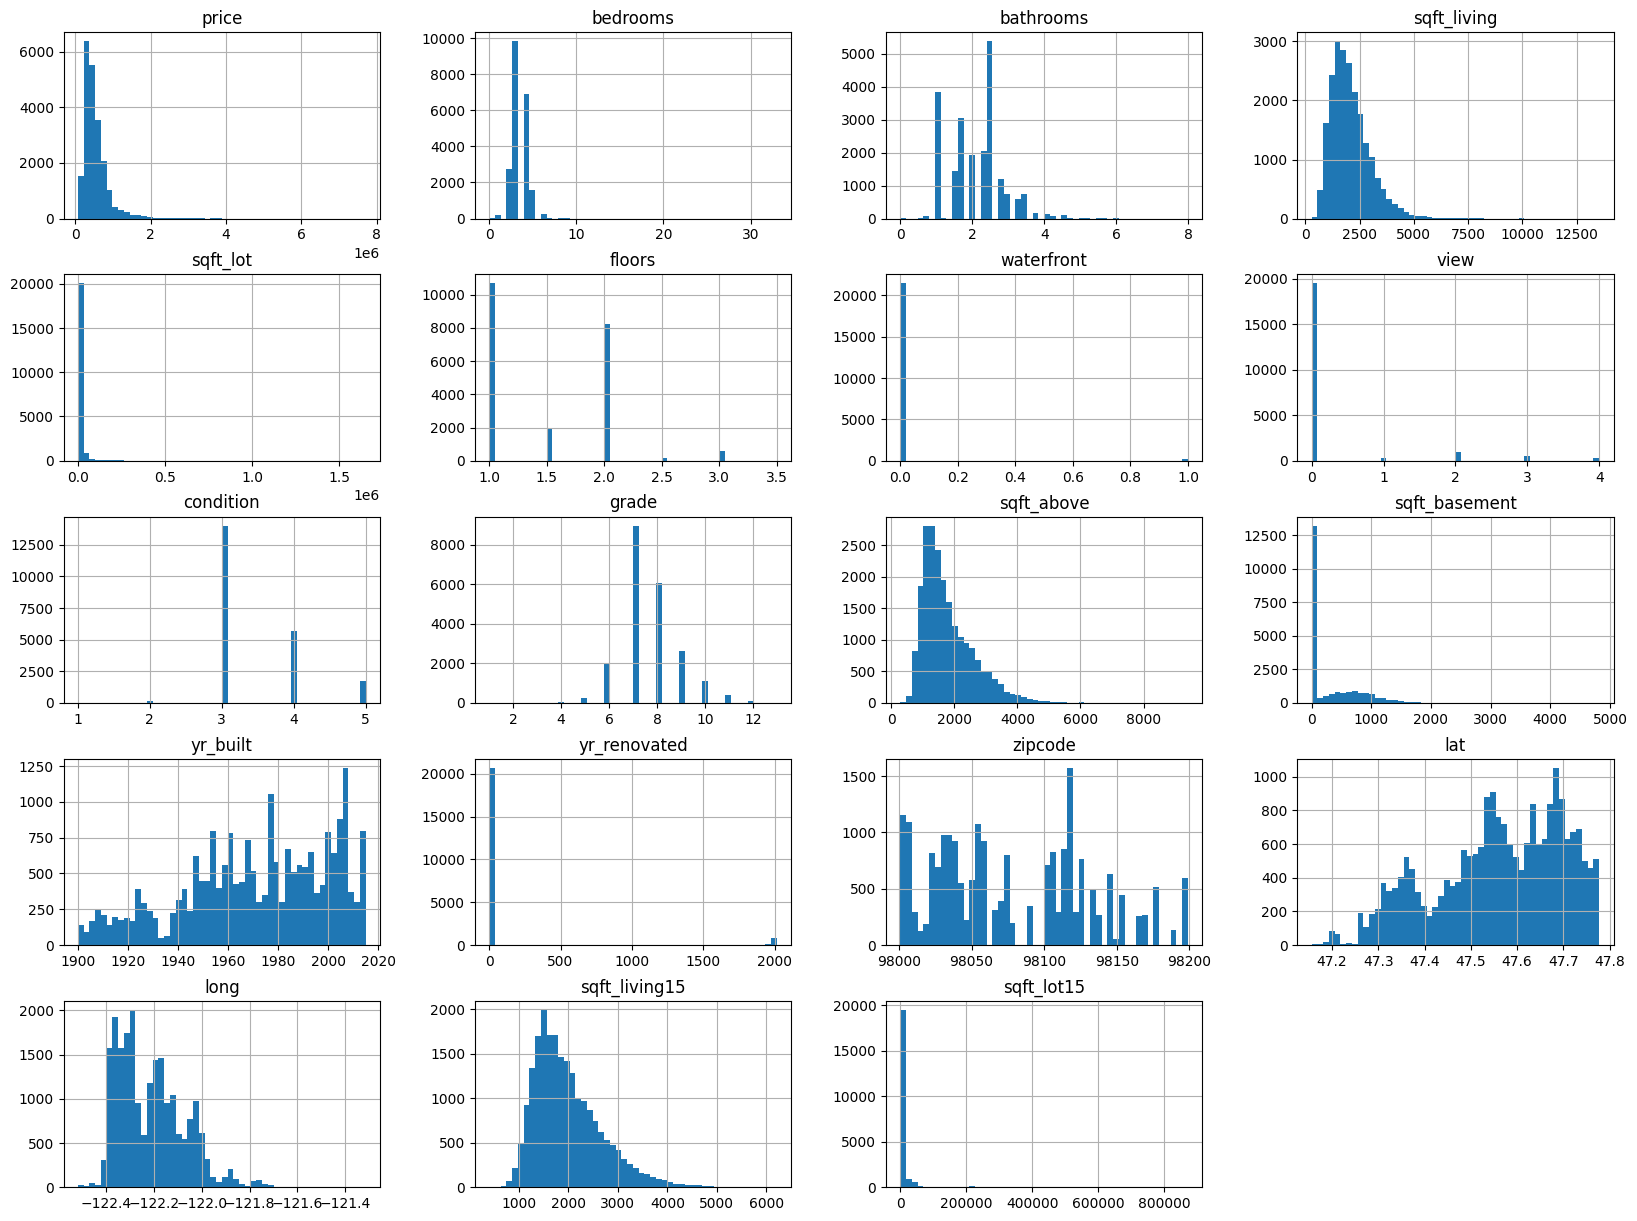

In [ ]:
data.hist(bins=50,figsize=(20,15))

In [ ]:
train_set , test_set = train_test_split(data,test_size = 0.2 , random_state = 42 )

In [ ]:

matrix= data.corr()
matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
new_data1=train_set[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']]
new_data2=test_set[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']]

In [ ]:
#new_data1.describe()

In [ ]:
#split = StratifiedShuffleSplit(n_splits=1,test_size = 0.2 , random_state = 42)
#for train_index,test_index in split.split(new_data1,new_data1['view'],new_data1['grade']):
 # strat_test_set = new_data2.loc[train_index]
#  strat_train_set = new_data1.loc[train_index]

In [ ]:
#strat_test_set["grade"].value_counts()
#strat_test_set["view"].value_counts()

In [ ]:
#from pandas.plotting import scatter_matrix
#a = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']
#scatter_matrix(new_data1[a],figsize = (20,20))

In [ ]:
x_train = new_data1.drop("price",axis=1)
y_train = new_data1[["price"]].copy()

In [ ]:
x_test = new_data2.drop('price',axis=1)
y_test = new_data2[["price"]].copy()

In [ ]:
x_train['sqft_grade'] = x_train['sqft_living']/x_train['grade']
x_test['sqft_grade'] = x_test['sqft_living']/x_test['grade']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
])

In [ ]:
y_train_norm = my_pipeline.fit_transform(y_train)
y_pre = my_pipeline.transform(y_test)
x_train_norm = my_pipeline.fit_transform(x_train)




In [ ]:
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(x_train_norm,y_train_norm)




<ipython-input-510-9d5614c4b5c3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_norm,y_train_norm)


RandomForestRegressor()

In [ ]:
predictions=model.predict(x_train_norm)
lin_mse = mean_squared_error(y_train_norm,predictions)
lin_rmse = np.sqrt(lin_mse)

In [ ]:
predictions

array([-0.38746289, -0.76251597, -0.84738849, ..., -0.15000533,
       -0.8586455 , -0.54908628])

In [ ]:
lin_rmse

0.23324703511608835

In [ ]:
scores = cross_val_score(model , x_train_norm , y_train_norm, scoring = "neg_mean_squared_error",cv = 10)
rsme = np.sqrt(-scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
rsme

array([0.6130752 , 0.68419574, 0.56661482, 0.62036738, 0.57662783,
       0.64085327, 0.58012423, 0.56197092, 0.60433719, 0.56035639])

In [ ]:
def print_scores(scores):
  print("scores:", scores)
  print("Mean:" , scores.mean())
  print("Std:", scores.std())



In [ ]:
print_scores(rsme)

scores: [0.6130752  0.68419574 0.56661482 0.62036738 0.57662783 0.64085327
 0.58012423 0.56197092 0.60433719 0.56035639]
Mean: 0.6008522970328289
Std: 0.037985460031570425


In [ ]:
from joblib import load,dump
dump(model,"House_prdictions.joblib")

['House_prdictions.joblib']

In [ ]:
x_pre = my_pipeline.transform(x_pre)
final_prediction = model.predict(x_pre)
final_mse = mean_squared_error(y_pre,final_prediction)
final_rmse = np.sqrt(final_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
final_rmse

1.3770480607089957